In [1]:
!pip install numpy scipy pandas matplotlib gensim os json
!pip install torch #version 1.8.1 not 0.4
!pip install gensim

  Using cached gensim-4.0.1-cp37-cp37m-manylinux1_x86_64.whl (23.9 MB)
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
  Using cached torch-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (804.1 MB)


In [17]:
import os
import json
with open(os.path.join('male.json')) as f:
    lines = f.readlines()
first_doc = json.loads(lines[0])
for key, value in first_doc.items():
    print(key, ':', value)

Unnamed: 0 : 1
song : my-elusive-dreams
year : 1970
artist : bobby-vinton
genre : Pop
text : you followed me to texas, you followed me to utah, we didn't find it there, so we moved on. you followed me to alabama. things looked good in burmingham. we didn't find it there, so we moved on. i know your tired of following my elusive dreams and scheems. for there only fleeting things. my elusive dreams. you had my child in memphus. i heard of work in nashville. we didn't find it there. so we moved on. to farm in nebraska. to a gold mine in alaska. we didn't find it there. so we moved on. and now we've left alaska. because there was no gold mine. but this time, only two of us move on. now all we have is each other. and a little memory to cling to. and still you won't let me go on alone. i know your tired of following my elusive dreams and scheems. for there only fleeting things. my elusive dreams. for there only fleeting things. my elusive dreams.
gender : M
ents : (2.884654434066845, 4.16167

In [12]:
# load the vocabualry
with open(os.path.join('prep_new_data_trial', 'train.vocab.json')) as f:
    vocab = json.load(f)
print("First few words in the vocbulary:")
print(vocab[100:150] + ['...'])

First few words in the vocbulary:
['808', '80s', '84s', '850', '8th', '900', '90s', '911', '9mm', '9th', 'aaa', 'aaaaah', 'aaaah', 'aaah', 'aah', 'aaliyah', 'aaron', 'abandon', 'abandoned', 'abc', 'abcs', 'abdomen', 'abe', 'abel', 'abide', 'abiding', 'abilene', 'abilities', 'ability', 'ablaze', 'able', 'aboard', 'abode', 'abort', 'abortion', 'abortions', 'abound', 'abracadabra', 'abraham', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolution', 'absorb', 'absorbed', 'abstract', 'absurd', 'abu', '...']


In [5]:
import run_scholar
script = 'run_scholar.py'
args = 'male -k 8 --epochs 50 --dev-folds 10 --seed 42 -o male/output'
print("python", script, args)
run_scholar.main(args.split())

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


python run_scholar.py male -k 8 --epochs 50 --dev-folds 10 --seed 42 -o male/output
Loading data
Loaded 86319 documents with 24501 features
Found 86315 non-empty documents
Computing background frequencies
Min/max word counts in training data: 6 139058
Network architecture:
embedding_dim: 300
n_topics: 8
vocab_size: 24501
label_type: None
n_labels: 0
n_prior_covars: 0
n_topic_covars: 0
l1_beta_reg: 0.0
l1_beta_c_reg: 0.0
l1_beta_ci_reg: 0.0
l2_prior_reg: 0.0
classifier_layers: 1
use_interactions: False
Optimizing full model
Epoch: 10 cost= 969.247963875
Epoch: 10; Dev perplexity = 1739.2516
Epoch: 20 cost= 962.771226017
Epoch: 20; Dev perplexity = 1540.5950
Epoch: 30 cost= 971.741004874
Epoch: 30; Dev perplexity = 1572.9725
Epoch: 40 cost= 969.674443769
Epoch: 40; Dev perplexity = 1563.8040
Background frequencies of top words:
like know love just got get now one see time
[0.01369536 0.01208255 0.01179763 0.01086446 0.0099122  0.00972743
 0.00845291 0.00671098 0.00657862 0.00638479]
Topi

In [18]:
import numpy as np
from run_scholar import print_top_words
beta_male= np.load('male/output/beta.npz')['beta']
print_top_words(beta_male, vocab, n_pos=10, n_neg=10)


IndexError: list index out of range

6
wouldn't it be nice if we were older? then we wouldn't have to wait so long and wouldn't it be nice to live together in the kind of world where we belong you know it's gonna make it that much better when we can say goodnight and stay together wouldn't it be nice if we could wake up in the morning when the day is new? and after having spent the day together hold each other close the whole night through happy times together we've been spending i wish that every kiss was never ending wouldn't it be nice? maybe if we think, and wish, and hope, and pray, it might come true baby, then there wouldn't be a single thing we couldn't do we could be married and then we'd be happy wouldn't it be nice? you know it seems the more we talk about it it only makes it worse to live without it but let's talk about it wouldn't it be nice?


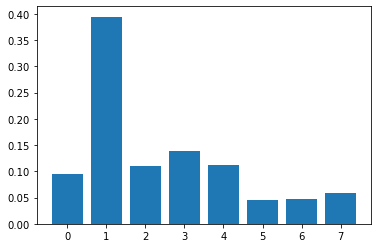

In [16]:
#visualize
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the matrix with topic proportions for each document (note that this excludes those in the dev set).
npz = np.load(os.path.join('male/output', 'theta.train.npz')) 
ids = npz['ids']
theta = npz['theta']
n_docs, n_topics = theta.shape

index = 5
# plot the proportion of each topic in the first document
fig, ax = plt.subplots()
ax.bar(range(n_topics), theta[index, :])

# find the original line corresponding to this document, and display the text
print(ids[index])
for line in lines:
    doc = json.loads(line)
    if doc['id'] == ids[index]:
        print(doc['text'])
        break


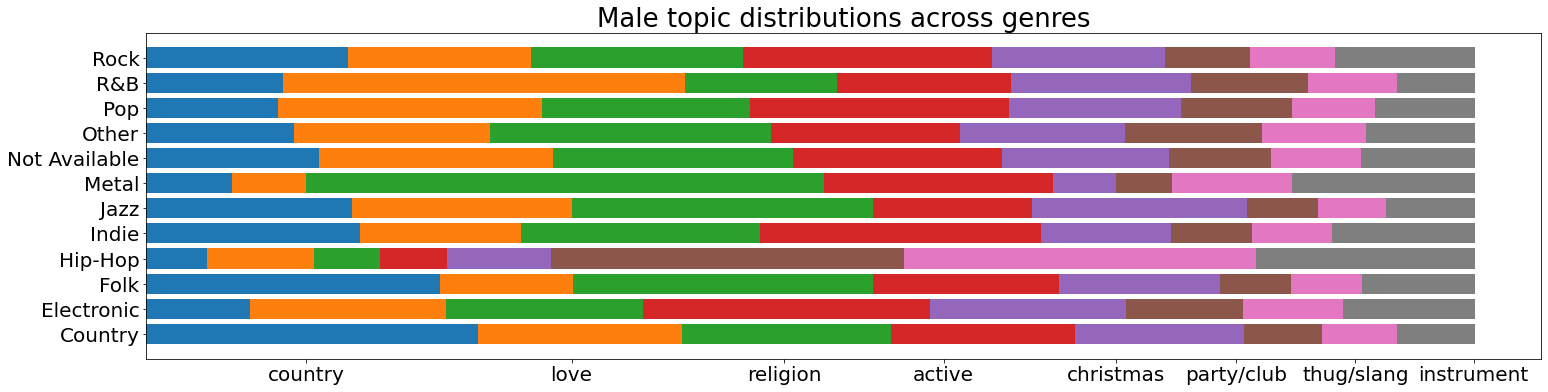

In [88]:

# load the senator variable for all the documents
groups_df = pd.read_csv(os.path.join('male', 'train.genre.csv'), header=0, index_col=0)
groups = groups_df.columns

# pull out a subset corresponding to the ids from above
train_subset = groups_df.loc[ids]
n_docs, n_groups = train_subset.shape

# plot the average senator-topic proportions
fig, ax = plt.subplots( figsize=(25,6))
lefts = np.zeros(n_groups)
for k in range(n_topics):
    vals = []
    for group in groups:
        vals.append(np.mean(theta[train_subset[group] == 1, k]))

    ax.barh(range(n_groups), vals, left=lefts)
    lefts += np.array(vals)

ax.set_yticks(range(n_groups))
ax.set_yticklabels(groups, fontsize = 20)
#ax.set_ylabel('Genre', size = 20)
#ax.set_xlabel('Topic distribution', size = 16)
ax.set_xticks([0.12, 0.32, 0.48, 0.6, 0.73,0.82, 0.91,0.999])
#ax.set_yticklabels(['1970-77', '1977-82','1982-87','1987-92', '1992-97','1997-01','2001-14', '2014-16'], fontsize = 20)
ax.set_xticklabels(['country', 'love','religion','active', 'christmas','party/club','thug/slang', 'instrument'], fontsize = 20)
                 
plt.title('Male topic distributions across genres', size = 26)
#[t.set_color(i) for (i,t) in
# zip(['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'],ax.xaxis.get_ticklabels())]
#ax.tick_params(axis='x', colors=zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'])
#[t.set_color(zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan']) for t in ax.xaxis.get_ticklabels()]
plt.show();

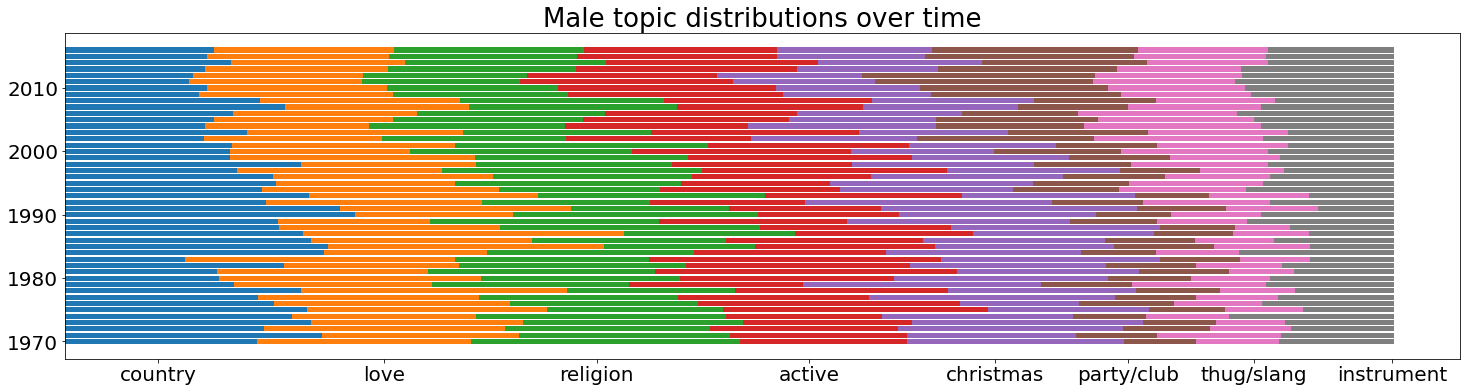

In [87]:
#### load the senator variable for all the documents
groups_df = pd.read_csv(os.path.join('male', 'train.year.csv'), header=0, index_col=0)
groups = groups_df.columns

# pull out a subset corresponding to the ids from above
train_subset = groups_df.loc[ids]
n_docs, n_groups = train_subset.shape

# plot the average senator-topic proportions
fig, ax = plt.subplots( figsize=(25,6))
lefts = np.zeros(n_groups)
for k in range(n_topics):
    vals = []
    for group in groups:
        vals.append(np.mean(theta[train_subset[group] == 1, k]))

    ax.barh(range(n_groups), vals, left=lefts)
    lefts += np.array(vals)

#ax.set_yticks(range(n_groups))
#ax.set_yticklabels(groups, fontsize = 20)
#ax.set_ylabel('Genre', size = 20)
#ax.set_xlabel('Topic distribution', size = 16)
ax.set_xticks([0.07, 0.24, 0.4, 0.56, 0.7,0.8, 0.895,0.999])
ax.set_yticks([0,10,20,30,40])
ax.set_yticklabels(['1970', '1980','1990','2000', '2010'], fontsize = 20)
ax.set_xticklabels(['country', 'love','religion','active', 'christmas','party/club','thug/slang', 'instrument'], fontsize = 20)
                 
plt.title('Male topic distributions over time', size = 26)
#[t.set_color(i) for (i,t) in
# zip(['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'],ax.xaxis.get_ticklabels())]
#ax.tick_params(axis='x', colors=zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'])
#[t.set_color(zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan']) for t in ax.xaxis.get_ticklabels()]
plt.show();